In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import os

/tmp/ipykernel_2217235/1279874213.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:
# TODO evaluatin of the contaminated  runs

In [3]:
dataset= 'mvtec'
run= "contamination_0"  
experiment=  "Exp_11_02_24-"#,"Exp0-r18",
category= "bottle"


RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  
ARGS_PATH= os.path.join(DATASET,run ,experiment+ f'{category}', "args.log")

### Inspect training criteria

In [4]:
def read_train_loss(PATH):
    with open(PATH, 'r') as file:
        lines = file.readlines()
        
        lines=[line for line in lines if line.startswith("[")]
        lines = [line.strip() for line in lines]   
    lines_new=[float(re.findall(r"Loss:(\d+\.\d+)", item)[0]) for item in lines]
    return lines_new

def get_categories_from_run_path(PATH):
    regex_pattern = r'-(\w+)$'
    extracted_categories = [re.search(regex_pattern, category).group(1) for category in list(os.listdir(PATH))]
    return extracted_categories

def plot_losses(RESPATH,dataset,run,experiment):
    
    RUN_PATH= os.path.join(RESPATH, dataset,run)
    categories=get_categories_from_run_path(RUN_PATH)
    for category in categories:
        ARGS_PATH= os.path.join(RUN_PATH, experiment+ f'{category}', "args.log")
        losses=read_train_loss(ARGS_PATH)
        plt.plot(losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Training Loss {category}')
        plt.show()


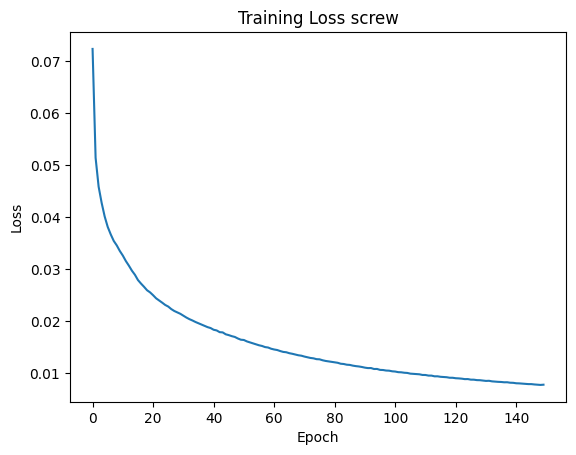

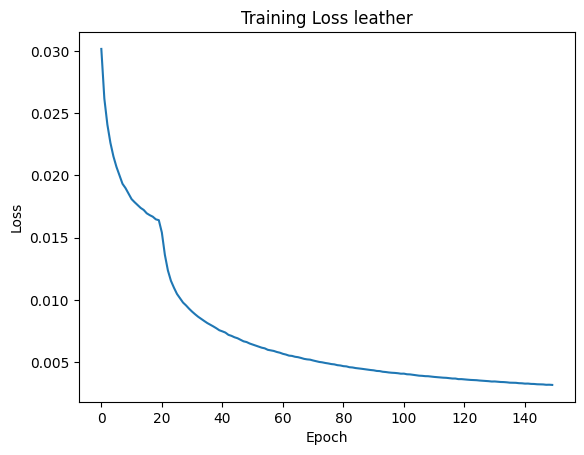

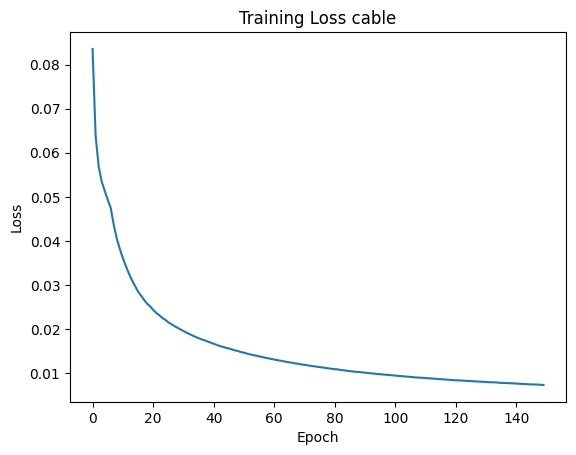

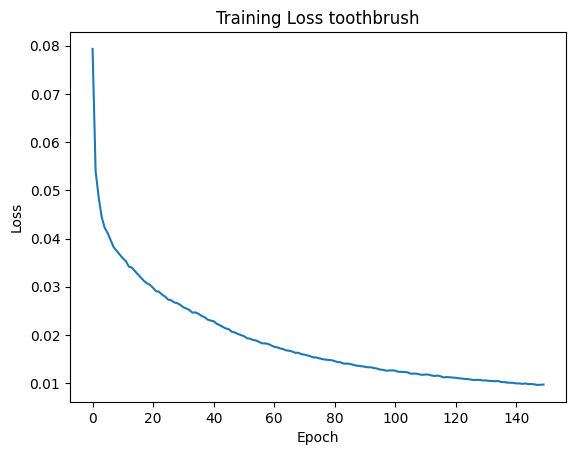

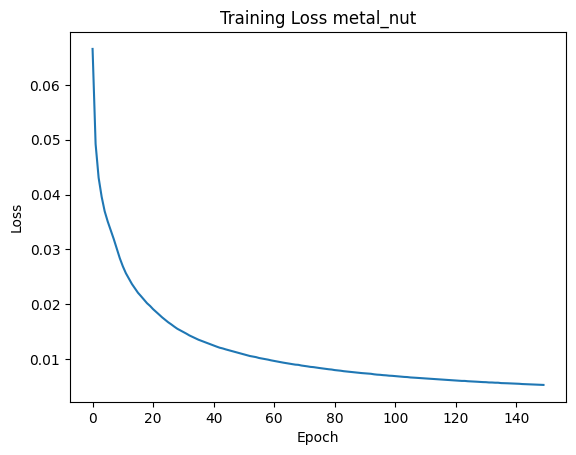

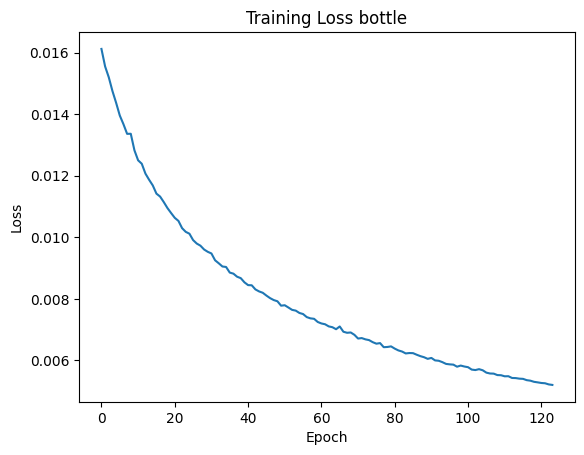

In [21]:
plot_losses(RESPATH,dataset='mvtec',run="clean",experiment="Exp0-r18-")